<a href="https://colab.research.google.com/github/temple17/kagglepractice/blob/main/Netflix_Movies_and_TV_Shows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/kaggle/Netflix Movies and TV Shows/dataset/netflix_titles.csv')

# Quick overview

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


- There are some missing data in 'director', 'cast', 'country', 'date_added', 'rating', 'duration'

In [ ]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# Interesting Task Ideas suggested in kaggle
- Understanding what content is available in different countries
- Identifying similar content by matching text-based features
- Network analysis of Actors / Directors and find interesting insights
- Does Netflix has more focus on TV Shows than movies in recent years.

# Exploratory Data Analysis Steps

## 1. Setting the goals about the dataset
- find popular tv shows and movies
- find similarities between these programs
- geographical difference
- distribution by genre


## 2. Precise EDA
### 2.1 univariate analysis
### 2.2 bi-variate analysis
### 2.3 missing value treatment
### 2.4 outlier treatment
#### 2.4.1 detect outlier
#### 2.4.2 remove outlier

## 3. Feature engineering
### 3.1 variable transformation
### 3.2 variable / feature selection
### 3.3 variable creation



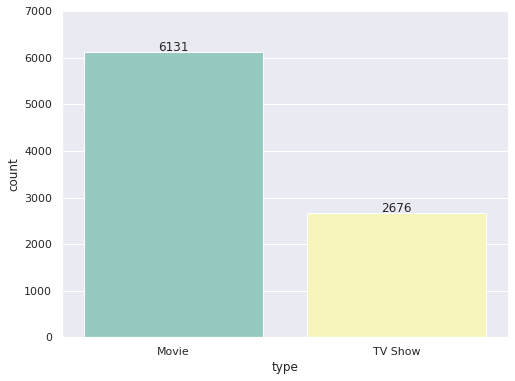

In [ ]:
plt.figure(figsize=(8,6))
sns.set(style = 'darkgrid')
ax = sns.countplot(x = 'type', palette='Set3', data = df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 15, height, ha = 'center', size = 12)

ax.set_ylim(0, 7000)
plt.show()

According to the above countplot, there are 6131 movies and 2676 TV shows.   
It means Movie count is 2.3 times as many as TV show's.

In [ ]:
df.groupby(['country', 'type']).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8794,s8795,Movie,اشتباك,Mohamed Diab,"Nelly Karim, Hany Adel, Tarek Abdel Aziz, Ahme...","Egypt, France","October 11, 2018",2016,TV-14,98 min,"Dramas, Independent Movies, International Movies",Amid the tumult following Egyptian President M...
8795,s8796,TV Show,Yu-Gi-Oh! Arc-V,NaN,"Mike Liscio, Emily Bauer, Billy Bob Thompson, ...","Japan, Canada","May 1, 2018",2015,TV-Y7,2 Seasons,"Anime Series, Kids' TV",Now that he's discovered the Pendulum Summonin...
8797,s8798,TV Show,Zak Storm,NaN,"Michael Johnston, Jessica Gee-George, Christin...","United States, France, South Korea, Indonesia","September 13, 2018",2016,TV-Y7,3 Seasons,Kids' TV,Teen surfer Zak Storm is mysteriously transpor...
8800,s8801,TV Show,Zindagi Gulzar Hai,NaN,"Sanam Saeed, Fawad Khan, Ayesha Omer, Mehreen ...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...","Strong-willed, middle-class Kashaf and carefre..."


# Most content creating countries

In [ ]:
netflix_movies = df[df['type'] == "Movie"]
netflix_shows = df[df['type'] == "TV Show"]

In [ ]:
countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou = list(netflix_movies['country'])
# print(cou)

['United States', 'Unknown', 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia', 'United States', 'Germany, Czech Republic', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'India', 'Unknown', 'United States', 'United States', 'United States, India, France', 'Unknown', 'Unknown', 'Unknown', 'China, Canada, United States', 'United States', 'United States', 'United States', 'United States', 'Unknown', 'South Africa, United States, Japan', 'United States', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Japan', 'Unknown', 'Unknown', 'Unknown', 'Nigeria', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'Unknown', 'United States', 'Nigeria', 'Unknown', 'Unknown', 'Spain, United States', 'France', 'Unknown', 'United Kingdom, United States', 'United States', 'United States', 'Unknown', 'India', 'United States', 'Unknown', 'Unknown', 'India', 'United Kingdom, Australia, France', 'India', 'United Kingdom, United States'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in cou:
    i = list(i.split(','))
    if len(i) == 1:
        if i in list(countries.keys()):
            countries[i] += 1
        else:
            countries[i[0]] = 1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j] += 1
            else:
                countries[j] = 1


In [ ]:
# print(countries)

{'United States': 1, 'Unknown': 1, ' Ghana': 1, ' Burkina Faso': 1, ' United Kingdom': 152, ' Germany': 104, ' Ethiopia': 1, 'Germany': 3, ' Czech Republic': 11, 'India': 1, ' India': 35, ' France': 155, 'China': 1, ' Canada': 132, ' United States': 388, 'South Africa': 7, ' Japan': 34, 'Japan': 3, 'Nigeria': 1, 'Spain': 1, 'France': 3, 'United Kingdom': 1, ' Australia': 33, ' Mexico': 25, ' Italy': 27, ' Romania': 4, 'Australia': 1, 'Argentina': 2, ' Venezuela': 2, ' Hong Kong': 24, 'Canada': 2, 'Hong Kong': 1, ' China': 55, 'Italy': 1, ' Nepal': 2, 'New Zealand': 2, ' Brazil': 10, ' Greece': 8, 'Colombia': 1, 'Mexico': 1, 'Belgium': 1, 'Switzerland': 5, 'Brazil': 1, ' Spain': 42, ' Nigeria': 7, 'Bulgaria': 4, '': 6, ' Algeria': 3, 'Poland': 1, ' Israel': 7, 'Saudi Arabia': 1, 'Thailand': 1, 'Indonesia': 1, 'Egypt': 3, ' Denmark': 15, ' Switzerland': 11, 'Kuwait': 1, ' Netherlands': 19, ' Singapore': 8, 'Malaysia': 1, 'South Korea': 1, 'Vietnam': 1, ' Belgium': 69, ' Hungary': 5, ' Ne

In [ ]:
countries_fin = {}
for country, no in countries.items():
    country = country.replace(' ', '')
    if country in list(countries_fin.keys()):
        countries_fin[country] += no
    else:
        countries_fin[country]= no

countries_fin = {k: v for k, v in sorted(countries_fin.items(), key = lambda item: item[1], reverse=True)}

In [ ]:
print(countries_fin)

{'UnitedStates': 389, 'France': 158, 'UnitedKingdom': 153, 'Canada': 134, 'Germany': 107, 'Belgium': 70, 'China': 56, 'Spain': 43, 'Japan': 37, 'India': 36, 'Australia': 34, 'Italy': 28, 'Mexico': 26, 'HongKong': 25, 'Sweden': 24, 'SouthAfrica': 23, 'Netherlands': 22, 'UnitedArabEmirates': 19, 'Argentina': 17, 'Denmark': 17, 'CzechRepublic': 16, 'Switzerland': 16, 'SouthKorea': 15, 'NewZealand': 12, 'Singapore': 12, 'Brazil': 11, 'Poland': 11, 'Ireland': 11, 'Norway': 11, 'Qatar': 10, 'Luxembourg': 10, 'Greece': 9, 'Bulgaria': 9, 'Russia': 9, 'Nigeria': 8, 'Israel': 8, 'Lebanon': 8, 'Egypt': 7, 'Chile': 7, 'Uruguay': 7, 'Serbia': 7, 'Jordan': 7, 'Finland': 7, 'Colombia': 6, '': 6, 'Thailand': 6, 'Hungary': 6, 'Taiwan': 6, 'Cambodia': 6, 'Portugal': 6, 'Iceland': 6, 'Peru': 6, 'Morocco': 6, 'Romania': 5, 'Austria': 5, 'Venezuela': 4, 'Indonesia': 4, 'Philippines': 4, 'Kenya': 4, 'Iran': 4, 'Ghana': 3, 'Algeria': 3, 'SaudiArabia': 3, 'Malaysia': 3, 'Turkey': 3, 'Zimbabwe': 3, 'Pakistan':

[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Japan'),
 Text(0, 0, 'India')]

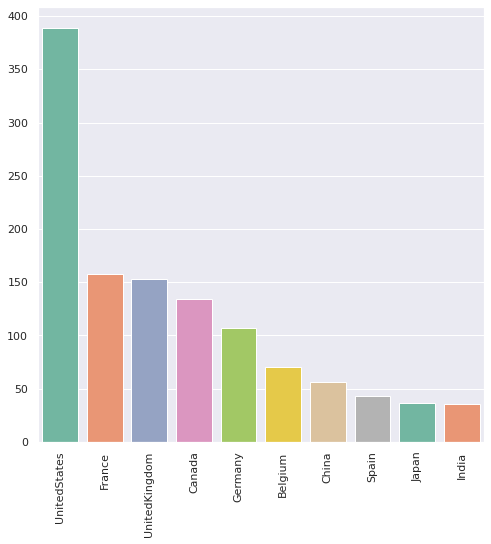

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x = list(countries_fin.keys())[0:10], y = list(countries_fin.values())[0:10], palette='Set2')
ax.set_xticklabels(list(countries_fin.keys())[0:10], rotation = 90)